In [1]:
# Data Management
import numpy as np

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

# Statistics
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from scipy.linalg import lstsq
import scipy.stats as st

# Window Display
import warnings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
warnings.filterwarnings('ignore')
%matplotlib inline

/data/keeling/a/tjhanke2/miniconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# Regression Analysis - Basics

In this module, we will try to understand the basics of regression, along with some advanced topics. 

Regression means to "return to another state". In statistics, we use this tool in order to go from messy, unexplainable data to a clear model. There are many different forms of regression, depending on the input data - linear regression, logistic regression, Poisson regression, etc.

Linear regression is the simplest form of regression to do. The mathematics behind it is simple - the model we will be looking for is to minimize the cost function, which in this case is the residual sum of squares:

$$RSS = \sum_{i}^{n}(y_i - (\beta_{1}x + \beta_{0}))^2$$

We would then solve for:
$$\frac{\partial RSS}{\partial \beta_{0}} = 0$$
$$\frac{\partial RSS}{\partial \beta_{1}} = 0$$

Doing so would give us our regression coefficients,
$$\beta_{0} = \bar{y} - \beta_{1}\bar{x}$$ 
$$\beta_{1} = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2}$$

Let's try this method out using synthetic data.

#### Linear

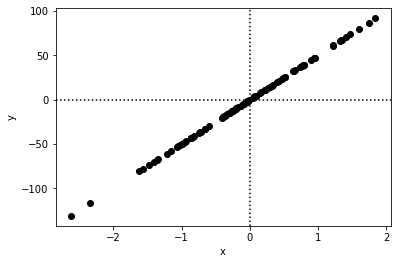

In [226]:
## Create and plot linear data
x,y = make_regression(n_samples=100,n_features=1)

plt.scatter(x,y,color='k')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0,linestyle='dotted',color='k')
plt.axvline(x=0,linestyle='dotted',color='k');

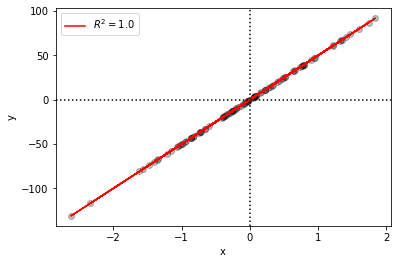

In [227]:
## Create regression model
x_mean = np.mean(x.T)
y_mean = np.mean(y)

beta_1 = np.sum((x.T - x_mean)*(y - y_mean)) / np.sum((x.T - x_mean)**2)
beta_0 = y_mean - beta_1*x_mean

reg = beta_1*x + beta_0
r2 = r2_score(y,reg)

plt.scatter(x,y,color='k',alpha=0.25)
plt.plot(x,reg,color='r',label='$R^2 = $' + str(r2))
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0,linestyle='dotted',color='k')
plt.axvline(x=0,linestyle='dotted',color='k')
plt.legend();

#### Multilinear

In some cases, the input data does not rely on just one variable - it could depend on two or more variables when developing a model. Regressing these variables individually will not work, because some of the data that would've been explained in variable a may actually depend on variable b. Therefore, our model needs to account for all variables. The cost function would now instead be:

$$RSS = \sum_{i}^{n}(y_i - (\beta_{2}x_2 + \beta_{1}x_1 + \beta_{0}))^2$$

Again, we would need to minimize this function for each coefficient. These coefficients would be:

$$\beta_{0} = \bar{y} - \beta_{1}\bar{x}_{1} - \beta_{2}\bar{x}_{2}$$ 
$$\beta_{1} = \frac{(\sum x_1y)(\sum x_2^2) - (\sum x_2y)(\sum x_1x_2)}{(\sum x_1^2)(\sum x_2^2) - (\sum x_1x_2)^2}$$
$$\beta_{2} = \frac{(\sum x_2y)(\sum x_1^2) - (\sum x_1y)(\sum x_1x_2)}{(\sum x_1^2)(\sum x_2^2) - (\sum x_1x_2)^2}$$

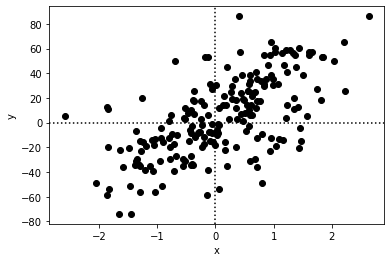

In [228]:
## Create and plot linear data
X,y,coef = make_regression(n_samples=100,n_features=2,n_informative=2,coef=True)
x1 = X.T[0]
x2 = X.T[1]

plt.scatter(x1,y,color='k')
plt.scatter(x2,y,color='k')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0,linestyle='dotted',color='k')
plt.axvline(x=0,linestyle='dotted',color='k');

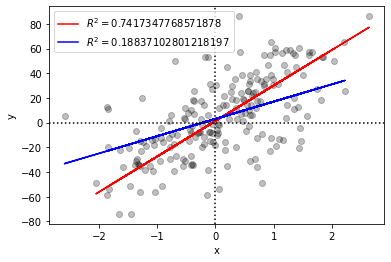

In [229]:
## Create regression model for each individual x_i
def mlr_ind(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    beta_1 = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
    beta_0 = y_mean - beta_1*x_mean

    return beta_1*x + beta_0

reg1 = mlr_ind(x1,y)
reg2 = mlr_ind(x2,y)
r2_reg1 = r2_score(y,reg1)
r2_reg2 = r2_score(y,reg2)

## Create full multilinear regression model
beta1 = (np.sum(x1*y)*np.sum(x2**2) - np.sum(x2*y)*np.sum(x1*x2)) / (np.sum(x1**2)*np.sum(x2**2) - np.sum(x1*x2)**2)
beta2 = (np.sum(x2*y)*np.sum(x1**2) - np.sum(x1*y)*np.sum(x1*x2)) / (np.sum(x1**2)*np.sum(x2**2) - np.sum(x1*x2)**2)
beta0 = np.mean(y) - beta1*np.mean(x1) - beta2*np.mean(x2)

reg = beta2*x2 + beta1*x1 + beta0
r2_reg = r2_score(y,reg)

## See how each 
plt.scatter(x1,y,color='k',alpha=0.25)
plt.scatter(x2,y,color='k',alpha=0.25)
plt.plot(x1,reg1,color='r',label='$R^2 = $' + str(r2_reg1))
plt.plot(x2,reg2,color='b',label='$R^2 = $' + str(r2_reg2))
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0,linestyle='dotted',color='k')
plt.axvline(x=0,linestyle='dotted',color='k')
plt.legend();

In [253]:
print('The R^2 score for the entire multilinear model is: ' + str(r2_reg))

The R^2 score for the entire multilinear model is: 1.0


# Regression Analysis - Advanced

Now that we know how linear and multilinear regression works, we can take a look at some more advanced regression techniques. These techniques are used for particular types of input data that linear (or multilinear) regression struggles to deal with. Some examples are:


Logistic regression - for binary data (0 or 1)
Poisson regression - for nonnegative integer data 
Ridge regression - for data with highly correlated predictors

We'll take a look at the mathematics and algorithms for logistic and ridge regression and how they compare to simple linear regression.

#### Logistic Regression 

Logistic regression is an algorithm that tries to learn a function that approximates the logistic distribution P(Y|X), and the approximation is a sigmoid function with a linear combination of datapoints. This assumption can be stated mathematically using:

$$P(Y=1|X=x) = \sigma(\theta^Tx)$$
$$P(Y=0|X=x) = 1 - \sigma(\theta^Tx)$$
$$\theta^Tx = \sum\theta_ix_i$$
$$\sigma(z) = \frac{1}{1+e^{-z}}$$

The Log Likelihood function is a function that can estimate how well the statistical model matches the input data. The likelihood function is based off of the probability that a single point from the model matches the input datapoint,

$$P(Y=y|X=x) = \sigma(\theta^Tx)^y [1 - \sigma(\theta^Tx)]^{(1-y)}$$

If we assume each datapoint is independent, then the total probability that the model matches all input data is

$$L = \prod P(Y=y_i|X=x_i) = \prod\sigma(\theta^Tx_i)^{y_i} [1 - \sigma(\theta^Tx_i)]^{(1-y_i)}$$

Finally, taking the log gives us the Log Likelihood,

$$LL = \sum {y_i log[\sigma(\theta^Tx)] + (1-y_i)log[1 - \sigma(\theta^Tx_i)]}$$

Logistic regression utilizes the maximum likelihood estimator, where we choose values of $\theta$ that maximizes the partial derivative of the LL function. The easiest way to do this is numerical through gradient descent.

Gradient descent is an algorithm that takes incremental steps towards the parameter value that maximizes the LL function. The algorithm would look like:

$$\theta^{new} = \theta_j^{old} + \eta\frac{\partial LL(\theta^{old})}{\partial\theta_j^{old}}$$

Where $\eta$ is the step size. Let's try this algorithm out.

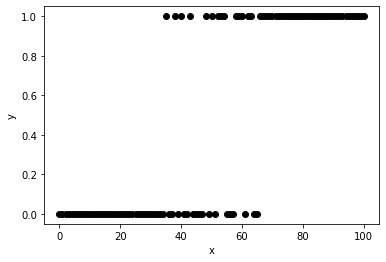

In [139]:
## Generate logistic dataset
x = np.arange(0,101)
y = np.zeros(len(x))
for i in x:
    if i > 33 and i <= 66:
        y[i] = np.random.choice([0, 1], size=None, p=[0.5, 0.5])
    elif i > 66:
        y[i] = 1
        
plt.scatter(x,y,color='k')
plt.xlabel('x')
plt.ylabel('y');

In [183]:
## Define sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

def weighted_sum(x,theta):
    return np.dot(x,theta)

def prob(x,theta):
    return sigmoid(weighted_sum(x,theta))

def cost_function(x,y,theta,b):
    m = x.shape[0]
    log_odds = y*np.log(prob((x+b),theta)) + (1-y)*np.log(1-prob((x+b),theta))
    cost = -(1/m) * np.sum(log_odds[np.isfinite(log_odds)])
    return cost

def grad_descent(x,y,theta,b):
    m = x.shape[0]
    grad = (1/m) * np.dot((x+b),(y - prob((x+b),theta))) 
    return grad
    
iterations = 100
theta = np.zeros(iterations)
b = np.zeros(iterations)
cost = []
for i in range(iterations):
    parameters = grad_descent(x, y, theta[i], b[i])
    cost.append(cost_function(x, y, theta[i], b[i]))
    
    if cost[i-1] < cost[i]:
        theta = np.trim_zeros(theta)
        b = np.trim_zeros(b)
        break
    
    theta[i+1] = theta[i]+parameters
    b[i+1] = b[i]+parameters

In [145]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression().fit(x.reshape(-1,1),y)
reg = log.predict(x.reshape(-1,1))

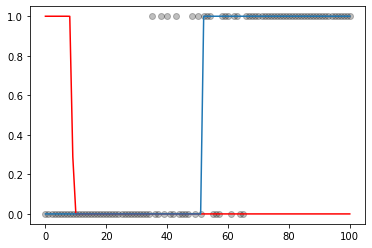

In [190]:
plt.scatter(x,y,color='k',alpha=0.25)
plt.plot(x,sigmoid(theta[-1]*(x+b[-1])),color='r')
plt.plot(x,reg)

#### Ridge Regression 

Ridge regression is a form of regularized regression, and is most useful for datasets in which the predictors are highly correlated with one another. In some cases, the predictors may even depend on the scaling of one another, so before applying ridge regression, it is best to standardize the predictors by dividing each element by the standard deviation. Ridge regression then handles these types of datasets by adding a penalty term $\lambda$. The cost function for ridge regression is:

$$C = \sum_i^n(y - \sum_j^p(\beta_jx_{ij}))^2 + \lambda\sum_j^p(\beta_j)^2$$

Similar to simple linear regression, we need to minimize the cost function to find the best fit parameters. This can be done numerically, which we will show.

In [192]:
def make_regression_corr(n_samples, n_uncorrelated, n_correlated, correlation, weights, bias, noise=1, seed=42):
    np.random.seed(seed)

    X_correlated = np.random.multivariate_normal(mean=np.zeros(n_correlated),
                                                 cov=correlation * np.ones((n_correlated, n_correlated)) + (1 - correlation) * np.eye(n_correlated),
                                                 size=n_samples)

    X_uncorrelated = np.random.multivariate_normal(mean=np.zeros(n_uncorrelated),
                                                   cov=np.eye(n_uncorrelated),
                                                   size=n_samples)

    X = np.hstack([X_correlated, X_uncorrelated])
    e = np.random.normal(loc=0, scale=noise, size=n_samples)
    y = bias + np.dot(X, weights) + e

    return X, y

def ridge(X,y,lamb):
    #return lstsq(X.T.dot(X) + lamb, X.T.dot(y))
    beta = []
    yhat = []
    for i in range(len(lamb)):
        lstsq_calc,_,_,_ = lstsq(X.T.dot(X) + lamb[i], X.T.dot(y))
        reg = lstsq_calc[0]*x1 + lstsq_calc[1]*x2 + lstsq_calc[2]*x3 + lstsq_calc[3]*x4
        
        beta.append(lstsq_calc)
        yhat.append(reg)
        
        if r2_score(y,yhat[i-1]) > r2_score(y,yhat[i]):
            return beta[i-1]
            break

The correlation is: 0.814139036094194


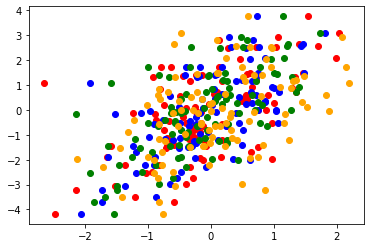

In [193]:
## Create dataset with correlated variables
X, y = make_regression_corr(n_samples=100,n_uncorrelated=1,n_correlated=3,correlation=0.87,weights=[0.5, 0.5, 0.5, 0.5],bias=0)
x1 = X.T[0]; x2 = X.T[1]; x3 = X.T[2]; x4 = X.T[3]

corr,_ = st.pearsonr(x1,x2)
print('The correlation is: ' + str(corr))

plt.scatter(x1,y,color='r')
plt.scatter(x2,y,color='b')
plt.scatter(x3,y,color='g')
plt.scatter(x4,y,color='orange');

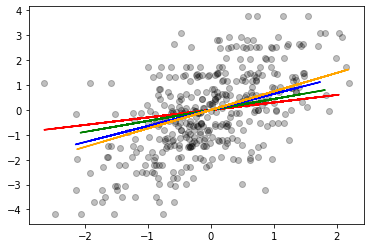

In [207]:
betas = ridge(X,y,np.logspace(-10,10))
lin_model = LinearRegression().fit(X,y)

reg1 = betas[0]*x1
reg2 = betas[1]*x2
reg3 = betas[2]*x3
reg4 = betas[3]*x4
reg = betas[0]*x1 + betas[1]*x2 + betas[2]*x3 + betas[3]*x4
lin_reg = lin_model.coef_[0]*x1 + lin_model.coef_[1]*x2 + lin_model.coef_[2]*x3 + lin_model.coef_[3]*x4
r2_reg = r2_score(y,reg)
r2_lin = r2_score(y,lin_reg)

plt.scatter(x1,y,color='k',alpha=0.25)
plt.scatter(x2,y,color='k',alpha=0.25)
plt.scatter(x3,y,color='k',alpha=0.25)
plt.scatter(x4,y,color='k',alpha=0.25)
plt.plot(x1,reg1,color='r')
plt.plot(x2,reg2,color='g')
plt.plot(x3,reg3,color='b')
plt.plot(x4,reg4,color='orange');

In [208]:
print('The R^2 score for the entire ridge model is: ' + str(r2_reg))
print('The R^2 score for the multilinear model is: ' + str(r2_lin))

The R^2 score for the entire ridge model is: 0.613811335485357
The R^2 score for the multilinear model is: 0.6136588377413115
